## Importando bibliotecas necessárias
Para o devido funcionamento do código, deve-se executar a célula abaixo para que as bibliotecas utilizadas sejam importadas:

In [133]:
import pandas as pd
import pymysql
import getpass
import matplotlib.pyplot as plt

## Realizando a conexão como MySQL
Para efetuar a conexão com o MySQL e obter o banco de dados, foi utilizada a biblioteca Pymysql:

In [18]:
password = getpass.getpass()

database = 'notes_app'
user = 'root'
host='localhost'

con = pymysql.connect(host=host, user=user, passwd=password, db=database)
cur = con.cursor()
cur.execute('SELECT * FROM disciplina')
con.autocommit(True)

 ········


## Criando os dataframes
A partir do banco de dados, foi criado um dataframe para a entidade disciplina e outro para a entidade nota:

In [3]:
disciplina = pd.read_sql("SELECT * FROM disciplina", con)
nota = pd.read_sql("SELECT * FROM nota", con)

Como é mais viável possuir apenas um dataframe, foi feita a união dos dataframes criados anteriormente:

In [19]:
df = pd.merge(nota, disciplina, left_on='disciplina', right_on='id_disciplina', how='left').drop(['id_disciplina', 'disciplina'], axis=1)
df.head()

,id_nota,titulo,texto,ultima_modificacao,data_criacao,numero_edicoes,nome,periodo
0,1,Matemática,"A matemática (dos termos gregos μάθημα, transl...",2020-07-24 16:44:49,2021-06-16 08:46:10,13,Algebra Linear,1
1,2,Equação linear,Diz-se em matemática que uma equação polinomia...,2019-02-05 03:07:41,2020-03-13 08:14:38,10,Algebra Linear,1
2,3,Equação algébrica,"Em matemática, equações algébricas são equaçõe...",2021-02-05 11:27:51,2021-08-13 04:38:18,6,Algebra Linear,1
3,4,Equação diferencial,"Em matemática, uma equação diferencial é uma e...",2020-08-24 06:47:59,2021-04-16 20:57:31,21,Algebra Linear,1
4,5,Vetor (matemática),"Em geometria analítica, um vetor é uma classe ...",2020-12-13 14:35:00,2021-05-01 15:50:43,20,Algebra Linear,1


## Análise: quantidade de palavras por disciplina
Observando as disciplinas individualmente, qual será a quantidade total de palavras levando em consideração todas as notas de cada uma?

In [124]:
disciplinas_series = pd.Series(data=df['texto'])
disciplinas_series.index = df['nome']
disciplinas_palavras = disciplinas_series.str.split(expand=True).stack()
palavras_por_disciplina = disciplinas_palavras.groupby('nome').count()
quantidade_ordenada = palavras_por_disciplina.sort_values(ascending=False)
print(quantidade_ordenada.to_string())

nome
Língua castelhana    10252
Filosofia             7951
Biologia              7526
Língua Inglesa        7187
Química               5523
Algebra Linear        3560
Geografia             3076


Percebe-se então que Língua Castelhana é a disciplina com mais palavras (somando a quantidade de palavras de todas as notas), enquanto Geografia é a disciplina com menos palavras.
Foi feito um gráfico de barras horizontais para melhor visualização:

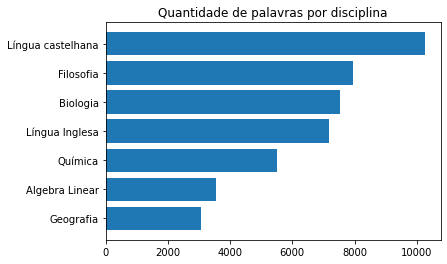

In [145]:
plt.barh(quantidade_ordenada.index, quantidade_ordenada)
plt.title('Quantidade de palavras por disciplina')
plt.gca().invert_yaxis()

Além disso, ainda nessa linha, foram filtradas as palavras mais recorrentes em cada disciplina (eliminando preposições, artigos e verbos genéricos) e a quantidade que aparecem:

In [129]:
disciplinas_series = pd.Series(data=df['texto'])
disciplinas_series.index = df['nome']
disciplinas_palavras = disciplinas_series.str.split(expand=True).stack()
d = disciplinas_palavras
disciplinas_palavras = d[(d != 'de') & (d != 'e') & (d != 'a') & (d != 'da') & (d != 'o') & (d != 'que') & (d != 'é')
                         & (d != 'como') & (d != 'do') & (d != 'um') & (d != 'em') & (d != 'uma') & (d != 'ou') & (d != 'com')
                         & (d != 'os') & (d != 'para') & (d != 'A') & (d != 'por') & (d != 'na') & (d != 'as') & (d != 'mais')
                         & (d != 'são') & (d != 'no') & (d != 'se') & (d != 'também') & (d != 'O') & (d != 'das') & (d != 'ao')
                         & (d != 'e') & (d != 'foi') & (d != 'dos') & (d != 'não')]

palavras_individuais = disciplinas_palavras.groupby('nome').value_counts()
disciplinas = disciplinas_series.index.unique().sort_values()

for index in range(0, len(disciplinas)):
     print(disciplinas[index] + ' -> ' + palavras_individuais[disciplinas[index]].head(1).to_string())


Algebra Linear -> geometria    18
Biologia -> biologia    37
Filosofia -> filosofia    31
Geografia -> espaço    14
Língua Inglesa -> línguas    45
Língua castelhana -> país    112
Química -> química    55


É interessante perceber que as palavras mais recorrentes condizem a nome da disciplina (estão fortemente relacionados).